<a href="https://colab.research.google.com/github/thfruchart/1nsi/blob/main/S9/COURS_Complexit%C3%A9_TRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mesure du temps d'exécution du tri par sélection

In [5]:
def tri_par_selection(t):
    # t[0:i] est trié et ses valeurs sont inférieurs ou égales à celles de t[i:]
    for i in range(len(t)-1): 
        # on cherche l'indice du minimum de t[i:]
        i_min = i 
        for k in range(i+1, len(t)): 
            if t[i_min] > t[k] :
                i_min = k
        # on range ce minimum à l'indice i (avant de poursuivre à l'indice i+1)
        t[i], t[i_min] = t[i_min], t[i] 
    return t

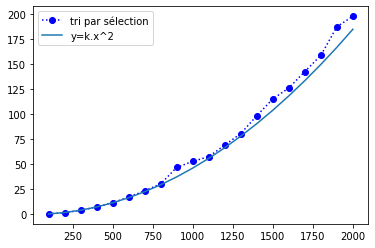

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

def chrono_tri_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [random() for i in range(n)]
    start = perf_counter()
    tri_par_selection(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri sur des tableaux de taille 100, 200, ... 2000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n))
# graphique
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri par sélection")

# fonction carrée (k.x^2)
abs = []
ord = []
k = 185/(4e6)
for n in range(100,2001,100):
    abs.append(n)
    ord.append(k* n**2)
plt.plot(np.array(abs), np.array(ord),label="y=k.x^2")
plt.legend()
plt.show() # affiche la figure a l'ecran

## Propriété :
* Le temps d'exécution du tri par sélection pour un tableau aléatoire de taille $n$ s'exprime par : $T(n) = O(n^2)$
* on dit que la complexité (temporelle) du tri par sélection est **quadratique**

### Question A
* on suppose que le tri d'un tableau aléatoire de taille N nécessite 200ms
* estimer la durée nécessaire au tri d'un tableau aléatoire de taille 3N.

#### réponse
* pour N => T(N) = 200 ms = $k . N^2$


* pour 3N => T(3N) =  $k . (3N)^2 = k . 3^2 N^2 = 9 . k .N^2$ = 9 x 200 ms = 1800 ms

Si la taille du tableau est multipliée par **3**, alors le temps d'exécution est multiplié par **$3^2$** soit 9!

### Question B
* on suppose que le tri d'un tableau aléatoire de taille N nécessite 200ms
* estimer le temps d'exécution du tri par sélection pour un tableau de taille N **déjà trié** !

On pourra modifier le code de la fonction ci-dessous.

In [14]:
from time import perf_counter
from random import random

def chrono_tri_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [random() for i in range(n)]
    start = perf_counter()
    tri_par_selection(t)
    stop = perf_counter()
    return 1000*(stop - start)

def chrono_tri_sur_tableau_deja_trie(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau trié de 'n' nombres flottants'''
    t = [i for i in range(n)]
    start = perf_counter()
    tri_par_selection(t)
    stop = perf_counter()
    return 1000*(stop - start)

print(chrono_tri_sur_taille(2000), chrono_tri_sur_tableau_deja_trie(2000))

196.05544999990343 204.2694300000676


Si on exécute le tri par sélection sur un tableau déjà trié... le temps d'exécution n'est pas meilleur.